In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import operator
#import gc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import describe
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error



In [5]:
### Read data

DATA_FOLDER = './data/'

df_train = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'))

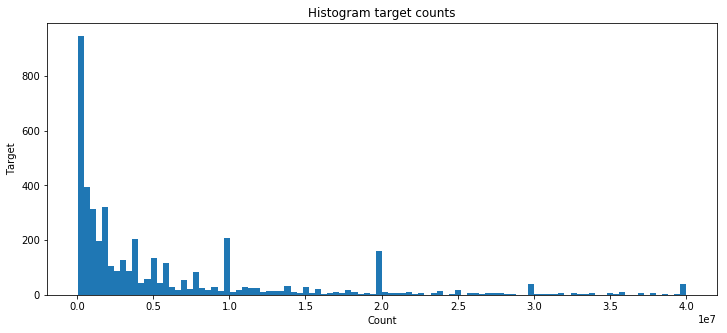

In [7]:
# Understand the basic information for the target
plt.figure(figsize = (12,5))
plt.hist(df_train.target.values, bins = 100)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

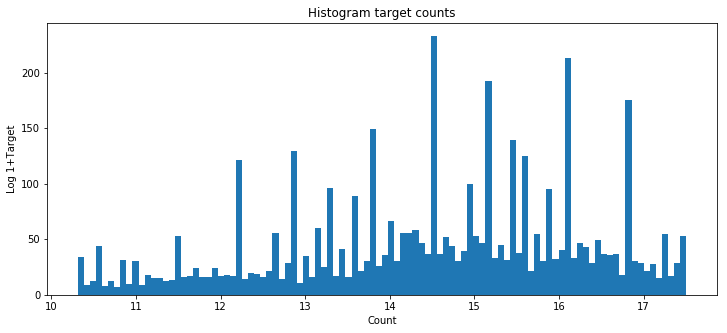

In [9]:
# The target is highly skewed, therefore a logrithmic distribution is required
plt.figure(figsize=(12, 5))
plt.hist(np.log(1+df_train.target.values), bins=100)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Log 1+Target')
plt.show()

In [ ]:
# Using violin plot
sns.set_style("whitegrid")
#ax = sns.violinplot(x=np.log(1+df_train.target.values))
ax = sns.violinplot(x=df_train.target.values)
plt.show()

# Explore the column

In [15]:
### Check constant column
constant_column = df_train.loc[:, (df_train == df_train.iloc[0]).all()].columns.tolist()
print ("Number of constant columns:", len(constant_column))


Number of constant columns: 256


In [16]:
# Use only non-constant column
useful_column = [x for x in df_train.columns.tolist() 
                 if x not in constant_column]

In [ ]:
### Describe the column value
plt.figure(figsize = (12,5))
plt.hist(df_train[useful_column].values.flatten(),bins = 100)
plt.title('Histogram of all values')
plt.xlabel('Count')
plt.ylabel('Value')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Basic understanding for the sparse data
print ("Total values:", df_train[useful_column].values.flatten().shape)
print ("Percentage of zero value", ((df_train[useful_column].values().flatten())==0)).mean()*100)
